In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [30]:
df_segmentation = pd.read_csv('pop_snps.csv')
feature_cols = feature_cols[2:-1]
df_nopheno = df_segmentation[feature_cols]

In [31]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_nopheno)

In [32]:
pca = PCA()
pca.fit(segmentation_std)

PCA()

In [35]:
pca.explained_variance_ratio_

33

Text(0, 0.5, 'Cumulative Explained Variance')

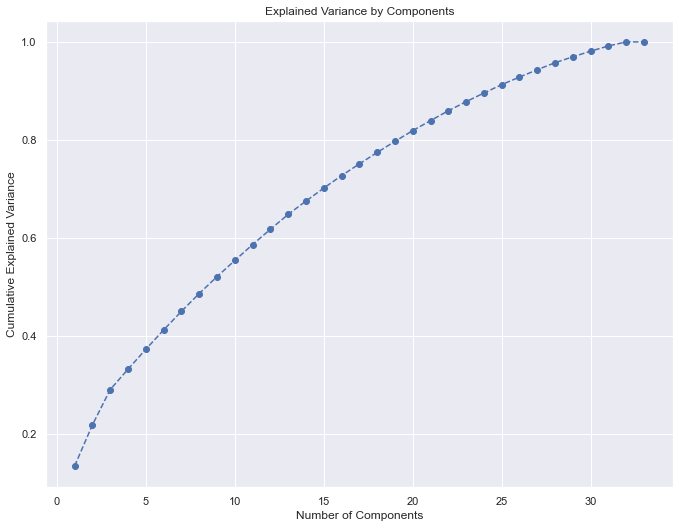

In [37]:
plt.figure(figsize = (10,8))
plt.plot(range(1,34), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [38]:
pca = PCA(n_components = 20)

In [39]:
pca.fit(segmentation_std)

PCA(n_components=20)

In [40]:
pca.transform(segmentation_std)

array([[ 5.90008413e-01,  1.18779851e+01, -3.32025419e+00,
         1.15661724e+00,  5.57398795e-02,  9.52870879e-01,
         3.42573760e+00,  5.19144688e+00,  4.24820839e+00,
        -1.58139157e+00,  7.82195373e+00, -3.79649886e+00,
        -4.45594529e+00, -2.49235895e+00, -5.27398032e-01,
        -1.42346740e+00,  1.84286041e+00, -2.78279454e+00,
        -4.20288086e-01, -4.45699079e+00],
       [ 3.62073280e+00, -5.24325682e+00,  7.13054245e+00,
         2.79314482e-01, -3.85322908e+00, -9.02113146e-01,
         5.86707611e+00,  6.08766650e+00,  2.15066440e+00,
        -1.99836012e+00, -1.88366483e+00,  1.63408863e-01,
         3.19363659e-01, -1.35573299e+00, -6.73217628e+00,
         1.52493264e+00, -1.33499754e+00,  1.88820870e+00,
         6.43869888e+00,  4.67703836e+00],
       [-5.30843409e+00,  2.86543158e+00, -5.01118815e+00,
         2.45790113e+00, -4.11270632e+00,  2.35567973e+00,
         6.42720317e+00, -4.01138906e+00, -2.89543560e+00,
         8.19479089e+00, -6.4

In [41]:
scores_pca = pca.transform(segmentation_std)

In [42]:
wcss = []
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
    

C:\Users\ryant\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


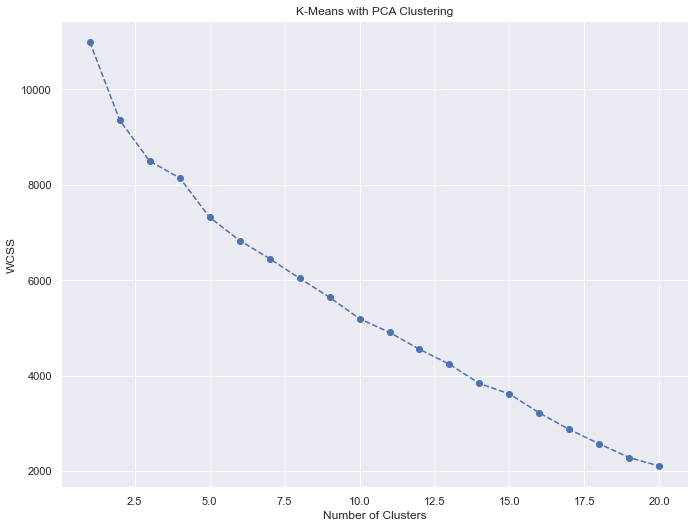

In [43]:
plt.figure(figsize = (10,8))
plt.plot(range(1,21), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-Means with PCA Clustering')
plt.show()

In [46]:
kmeans_pca = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)

In [47]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=2, random_state=42)

In [51]:
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-20: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7', 'Component 8', 'Component 8', 'Component 9', 'Component 10', 'Component 11', 'Component 12', 'Component 13', 'Component 14', 'Component 15', 'Component 16', 'Component 17', 'Component 18', 'Component 19']
df_segm_pca_kmeans['Segment K-Means PCA'] = kmeans_pca.labels_

In [52]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-Means PCA'].map({0:'first', 1:'second', 2:'third', 3:'fourth'})

C:\Users\ryant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


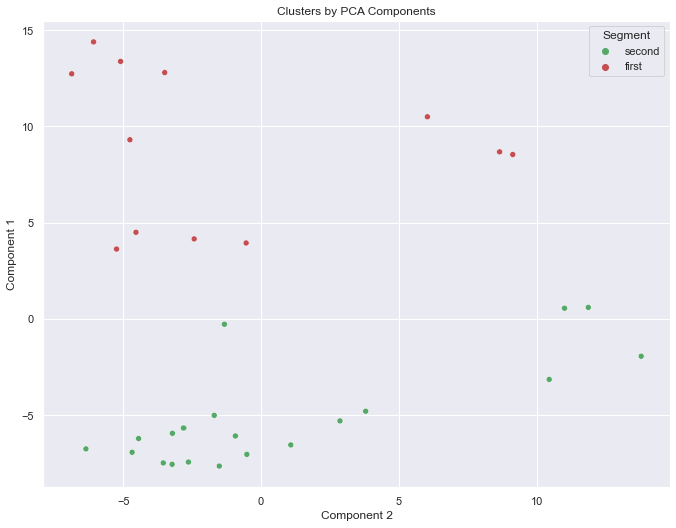

In [53]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment'], palette = ['g', 'r'])
plt.title('Clusters by PCA Components')
plt.show()